Lấy dữ liệu bằng api.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Thu thập dữ liệu** 

In [2]:
INDICATOR_CODES = ['SP.POP.TOTL', # Tổng dân số
                   'SP.POP.TOTL.FE.IN', # Dân số nữ
                   'SP.POP.TOTL.MA.IN', # Dân số nam
                   'SP.DYN.CBRT.IN', # Tỉ lệ sinh(Trên 1000 dân)
                   'SP.DYN.CDRT.IN', # Tỉ lệ tử(Trên 1000 dân)
                   'NY.GDP.MKTP.CD', # GDP(USD)
                   'SL.UEM.TOTL.ZS', # Tỉ lệ thất nghiệp(%)
                   'SP.URB.TOTL.IN.ZS', # Tỉ lệ dân số đô thị(%)
                   'NE.EXP.GNFS.ZS', # Xuất khẩu hàng hóa và dịch vụ(%GPD)
                   'NE.IMP.GNFS.ZS', # Nhập khẩu hàng hóa và dịch vụ(%GPD)
                   'NY.GDP.MKTP.KD.ZG', #Tốc độ tăng trưởng GPD(%)
                   'SP.URB.GROW', # Tốc độ tăng trưởng dân số đô thị hằng năm(%)
                   'SP.DYN.TFRT.IN', # Tổng tỉ suất sinh(Số con trung bình của 1 phụ nữ)
                   'SL.AGR.EMPL.ZS', # Tỉ lệ lao động ở ngành nông nghiệp(%)
                   'SL.IND.EMPL.ZS', # Tỉ lệ lao động ở ngành công nghiệp(%)
                   'SL.SRV.EMPL.ZS',  # Tỉ lệ lao động ở ngành dịch vụ(%)
                   'NV.AGR.TOTL.ZS', # Tỉ trọng ngành nông nghiệp(%GDP)
                   'NV.IND.TOTL.ZS', # Tỉ trọng ngành công nghiệp(%GDP)
                   'NV.SRV.TOTL.ZS', # Tỉ trọng ngành dịch vụ(%GDP)
                   ]

In [3]:
COUNTRY_CODES = ['AUS', 'AFG', 'BGD', 'BTN', 'BRA', 'CHL', 'CAN', 'CHN', 'CUB', 'DEU', 'DNK', 'EGY', 'ETH', 'GBR',
                  'IDN', 'IND', 'JPN', 'KHM', 'LBY', 'MMR', 'MEX', 'SGP', 'PHL', 'RUS', 'THA', 'USA', 'VNM', 'ZWE']

In [4]:
def loadData(country_code, start, end, format = "json", per_page = 100):

    records = {}
    for indicator_code in INDICATOR_CODES:
        url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_code}?date={start}:{end}&format=json&per_page={per_page}"
        response = requests.get(url)

        if response.status_code == 200:

            data = response.json()
            
            count = data[0]['total']

            
            for i in range(count):
                item = data[1][i]
                feature = item['indicator']['value']
                country = item['country']['value']
                year = item['date']
                value = item['value']

                if year not in records:
                    records[year] = {"Year": year}
                
                records[year]['Country'] = country

                records[year][feature] = value
            

        df = pd.DataFrame(records.values())

    return df
        
    

In [5]:
raw_data = pd.DataFrame()
for country in COUNTRY_CODES:
    print(country)

    df = loadData(country, 1980, 2020)
    raw_data = pd.concat([raw_data, df], ignore_index=True)

AUS
AFG
BGD
BTN
BRA
CHL
CAN
CHN
CUB
DEU
DNK
EGY
ETH
GBR
IDN
IND
JPN
KHM
LBY
MMR


C:\Users\ndh01\AppData\Local\Temp\ipykernel_17088\813692037.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  raw_data = pd.concat([raw_data, df], ignore_index=True)


MEX
SGP
PHL
RUS
THA
USA
VNM
ZWE


In [6]:
raw_data.head()
raw_data.to_csv('Data.csv', index=False)

# **Tiền xử lý dữ liệu**

In [7]:
import pandas as pd

In [8]:
raw_data = pd.read_csv('Data.csv')

In [9]:
# check the number of columns having null values
null_counts = raw_data.isnull().sum()
num_columns_with_null = (null_counts > 0).sum()
print(f"The number of column having null values: {num_columns_with_null}")

The number of column having null values: 11


In [10]:
developed_countries = ['Australia', 'Canada', 'Germany', 'Denmark', 'United Kingdom', 'Japan', 'Singapore', 'United States']
undeveloped_countries = ["Cambodia", "Myanmar", "Zimbabwe"]
# Đánh chỉ số 0 cho các nước phát triển, 1 cho các nước đang phát triển, 2 cho các nước chưa phát triển
raw_data['Development_Status'] = raw_data['Country'].apply(lambda x: 'Developed' if x in developed_countries else ('Least developed' if x in undeveloped_countries else 'Developing'))


In [11]:
# normalize the null values by the average value of each column following the Development_Status
numeric_columns = raw_data.select_dtypes(include=['number']).columns
raw_data[numeric_columns] = raw_data.groupby("Development_Status")[numeric_columns].transform(lambda x: x.fillna(x.mean()))
preprocessed_data = raw_data
preprocessed_data.to_csv("processed_data.csv", index=False)


# **Đặt câu hỏi**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('processed_data.csv')
data.head(5)

,Year,Country,"Population, total","Population, female","Population, male","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),...,GDP growth (annual %),Urban population growth (annual %),"Fertility rate, total (births per woman)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Development_Status
0,2020,Australia,25649248,12922405,12726843,11.5,6.3,1.328414e+12,6.456,86.241,...,-0.119591,1.369185,1.581,2.765998,19.191097,78.042912,2.012249,25.386456,66.250518,Developed
1,2019,Australia,25334826,12762303,12572523,12.1,6.7,1.392724e+12,5.159,86.124,...,2.171545,1.607625,1.657,2.558293,19.058460,78.383247,2.115781,25.272079,66.012913,Developed
2,2018,Australia,24963258,12575335,12387923,12.6,6.3,1.427809e+12,5.300,86.012,...,2.878470,1.621636,1.740,2.616852,19.887638,77.495518,2.460038,24.124058,66.562652,Developed
3,2017,Australia,24592588,12390298,12202290,12.6,6.5,1.325583e+12,5.592,85.904,...,2.279592,1.767968,1.741,2.596054,19.430111,77.973844,2.706447,23.474061,66.892763,Developed
4,2016,Australia,24190907,12185876,12005031,12.9,6.6,1.206837e+12,5.711,85.800,...,2.759386,1.677390,1.752,2.621225,19.695735,77.683040,2.405553,22.319976,68.127659,Developed


In [3]:
group_data = data.groupby(['Development_Status', 'Year']).mean(numeric_only=True).reset_index()
group_data

,Development_Status,Year,"Population, total","Population, female","Population, male","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),...,Imports of goods and services (% of GDP),GDP growth (annual %),Urban population growth (annual %),"Fertility rate, total (births per woman)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)"
0,Developed,1980,6.567243e+07,3.364070e+07,3.203173e+07,14.187500,8.637500,7.516095e+11,5.993121,80.772000,...,44.421308,2.064134,0.868417,1.741313,2.520308,24.378595,73.101098,1.755782,26.199963,64.317048
1,Developed,1981,6.615829e+07,3.387503e+07,3.228326e+07,13.975000,8.600000,7.945263e+11,5.993121,80.883375,...,43.645102,2.921224,1.325965,1.707125,2.520308,24.378595,73.101098,1.783275,26.019725,64.474461
2,Developed,1982,6.660706e+07,3.409079e+07,3.251627e+07,13.900000,8.575000,7.977311e+11,5.993121,80.955000,...,41.233728,1.778784,1.189127,1.697062,2.520308,24.378595,73.101098,1.808177,25.888808,64.650525
3,Developed,1983,6.701443e+07,3.428028e+07,3.273415e+07,13.587500,8.625000,8.456591e+11,5.993121,81.011125,...,38.260143,3.194431,0.694570,1.661625,2.520308,24.378595,73.101098,1.709347,26.039923,64.522202
4,Developed,1984,6.740238e+07,3.445942e+07,3.294296e+07,13.500000,8.525000,9.001943e+11,5.993121,81.047375,...,38.084433,5.045416,0.709737,1.648313,2.520308,24.378595,73.101098,1.773265,26.180501,64.300996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Least developed,2016,2.731626e+07,1.386598e+07,1.345029e+07,24.455000,7.657667,3.680120e+10,2.553333,28.320000,...,47.346654,4.889643,1.957327,2.844000,51.619059,16.828672,31.552276,17.470197,29.993591,47.245135
119,Least developed,2017,2.759360e+07,1.400687e+07,1.358673e+07,23.997667,7.616333,4.882779e+10,2.613667,28.513000,...,39.934583,6.097137,1.985281,2.804333,51.426519,16.822259,31.751219,16.173349,34.371543,45.385699
120,Least developed,2018,2.786041e+07,1.414268e+07,1.371773e+07,23.582667,7.489333,4.505416e+10,2.563333,28.725333,...,45.281435,6.684984,1.990836,2.769000,50.447608,17.405361,32.147030,15.297643,34.957594,45.721984
121,Least developed,2019,2.813113e+07,1.428042e+07,1.385071e+07,23.153667,7.560667,4.582262e+10,2.633000,28.955667,...,44.341122,2.727871,2.062570,2.733667,50.674225,17.436557,31.889224,15.366642,36.494718,44.186752


In [5]:
group_df= group_data.copy()


Index(['Development_Status', 'Year', 'Population, total', 'Population, female',
       'Population, male', 'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)', 'GDP (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Urban population (% of total population)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)', 'GDP growth (annual %)',
       'Urban population growth (annual %)',
       'Fertility rate, total (births per woman)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Services, value added (% of GDP)'],
      dty

### Câu 1: Phân tích tình hình tăng trưởng GPD, tỉ lệ xuất nhập khẩu hàng hóa và dịch vụ ở các nhóm nước

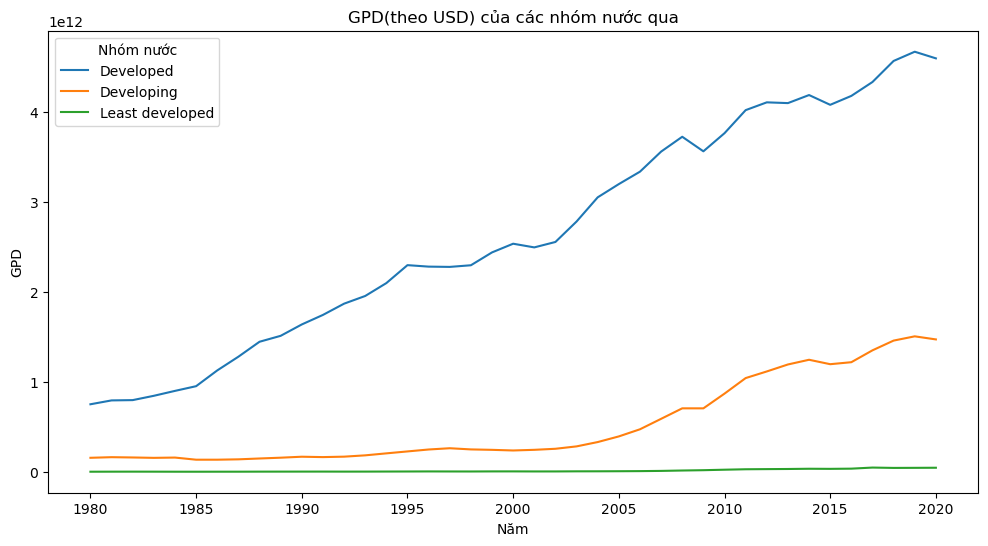

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='GDP (current US$)', hue='Development_Status')

plt.title('GPD(theo USD) của các nhóm nước qua')
plt.xlabel('Năm')
plt.ylabel('GPD')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- GPD của các nước phát triển và đang phát triển có sự tăng đáng kể.
- Nhóm nước đang phát triển bắt đầu tăng mạnh từ những năm 2000.
- Nhóm nước chưa phát triển có GPD không thay đổi nhiều

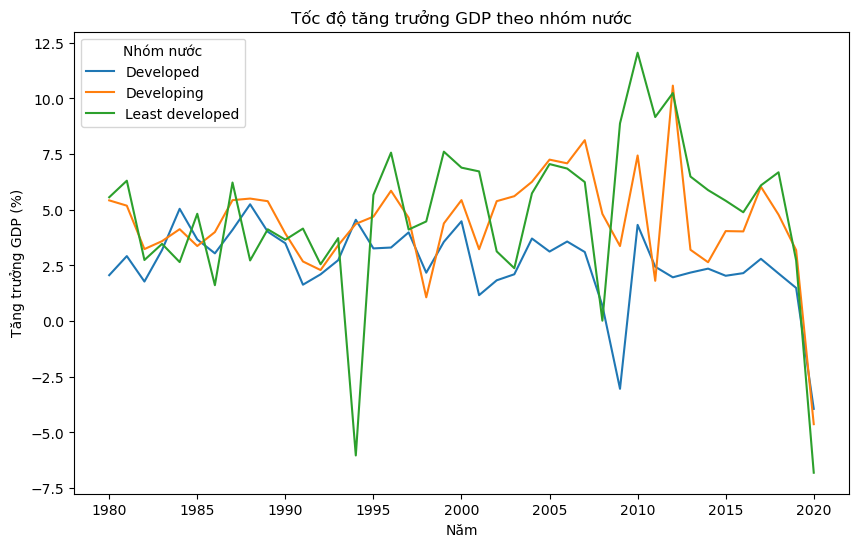

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=group_data, x='Year', y='GDP growth (annual %)', hue='Development_Status', markers="o")

plt.title('Tốc độ tăng trưởng GDP theo nhóm nước')
plt.xlabel('Năm')
plt.ylabel('Tăng trưởng GDP (%)')
plt.legend(title="Nhóm nước")
plt.show()


**Phân tích:**
- Nhìn chung, tỉ lệ tăng trưởng GPD của nhóm nước phát triển và đang phát triển phần lớn đều dương.
- Đa phần là nhóm nước đang phát triển có tỉ lệ tăng trưởng cao hơn nhóm nước phát triển
- Tỉ lệ tăng trưởng của nhóm nước kém phát triển có sự biến động mạnh

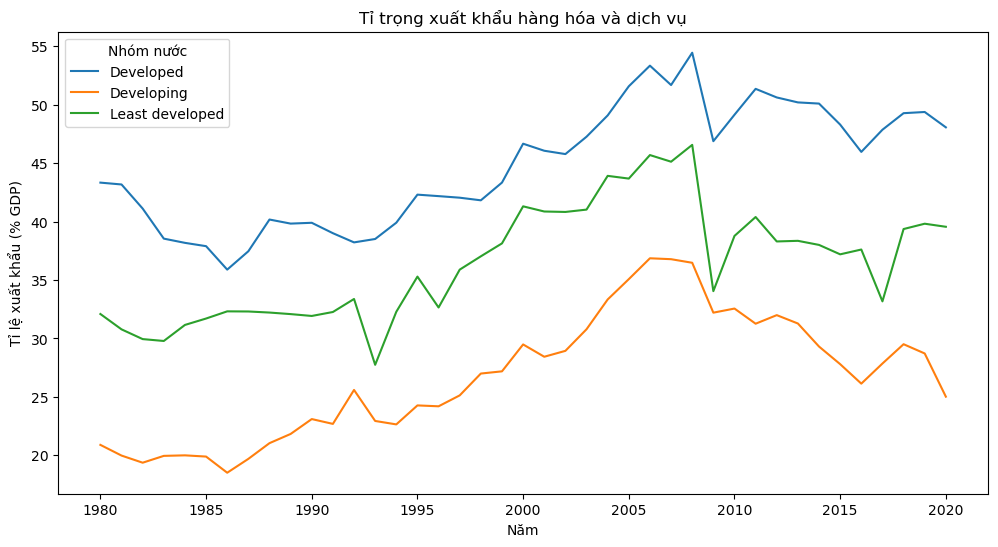

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Exports of goods and services (% of GDP)', hue='Development_Status')

plt.title('Tỉ trọng xuất khẩu hàng hóa và dịch vụ')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ xuất khẩu (% GDP)')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Tỉ trọng xuất khẩu của các nước đều có xu hướng tăng theo thời gian.
- Nhóm nước đang phát triển lại có tỉ trọng xuất khẩu thấp nhất.

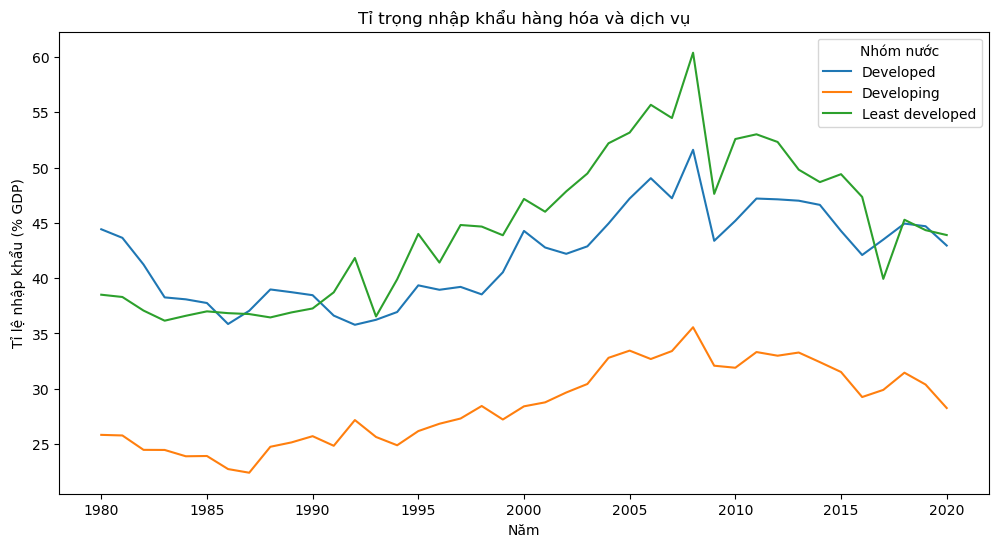

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Imports of goods and services (% of GDP)', hue='Development_Status')

plt.title('Tỉ trọng nhập khẩu hàng hóa và dịch vụ')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ nhập khẩu (% GDP)')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Tỉ trọng nhập khẩu xu hướng tăng theo thời gian.
- Nhóm nước đang phát triển có tỉ trọng nhập khẩu thấp nhất

**Kết luận:**
- Nhóm nước phát triển và đang phát triển có tỉ lệ tăng trưởng gpd cao, tăng trong nhiều năm liền. Điều này cho thấy tình hình kinh tế đang tăng trưởng ổn định, có định hướng kinh tế lâu dài.
- Nhóm nước chậm phát triển tuy vẫn có tăng, nhưng những biến động mạnh cho thấy các nước này có nên kinh tế bất ổn, có tiềm ẩn có nguy cơ suy thoái mạnh.
- Điều khác lạ là nhóm nước chậm phát triển lại có tỉ trọng xuất khẩu khá cao, đi cùng với tỉ trọng nhập khẩu cao. Điều này có thể là do các nước chậm phát triển có chi phí nhân công rẻ, nên được các công ty, tập đoàn chọn làm nơi đặt nhà máy, do đó tỉ lệ nhập khẩu nguyên vật liệu và xuất khẩu hàng hóa cao. Cùng với việc GPD của các nước này còn thấp nên tạo thành việc tỉ trọng cao như trên.
- Trái lại, các nước đang phát triển có tỉ lệ xuất nhập khẩu khá thấp do GPD đã cao, cùng với nhu cầu trong nước, nội địa hóa các dây chuyền sản xuất.

### Câu 2: Tình hình dân số của các nhóm nước

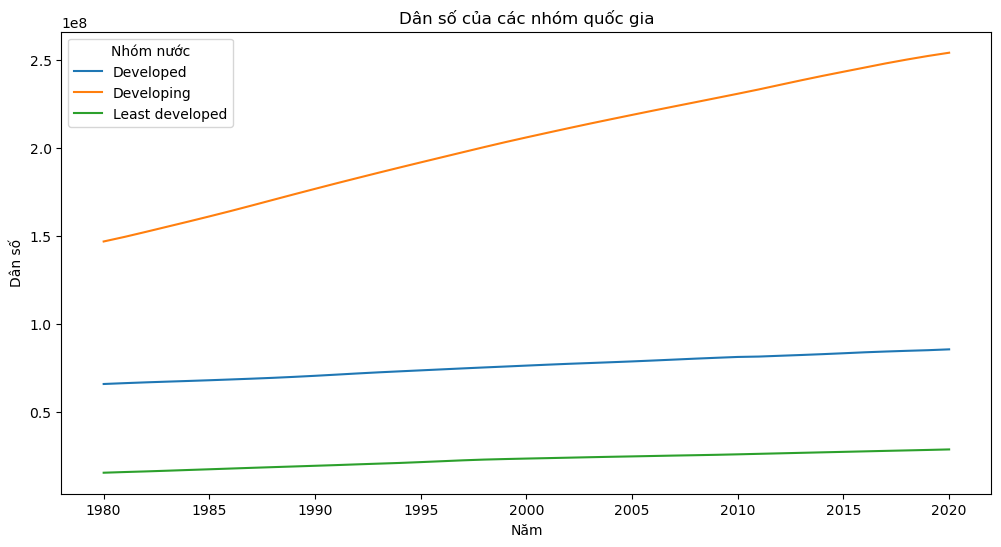

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Population, total', hue='Development_Status')

plt.title('Dân số của các nhóm quốc gia')
plt.xlabel('Năm')
plt.ylabel('Dân số')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Nhóm nước đang phát triển có dân số đông hơn nhiều so với 2 nhóm còn lại.
- Tốc độ tăng trưởng của nhóm nước đang phát triển cũng cao hơn.

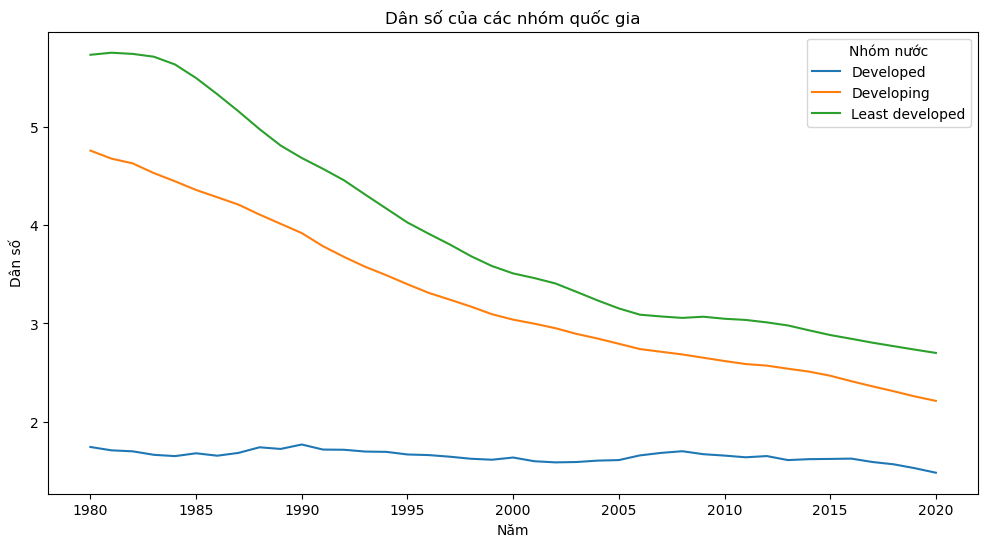

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Fertility rate, total (births per woman)', hue='Development_Status')

plt.title('Dân số của các nhóm quốc gia')
plt.xlabel('Năm')
plt.ylabel('Dân số')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Tỉ lệ sinh của các nhóm nước đều giảm
- Tỉ lệ sinh của nhóm nước chưa phát triển cao nhất
- Các nước phát triển có tỉ lệ sinh phá thấp, và xu hướng vẫn đang giảm

**Kết luận:**
- Tỉ lệ sinh của nhóm nước chưa phát triển và đang phát triển đều cao. Tuy nhiên, xu hướng đều đang giảm, điều này là do các nước đều có những chính sách để không bị bùng nổ dân số quá nhanh, gây áp lực lên các vấn đề xã hội.
- Nhóm nước phát triển có tỉ lệ sinh thấp, dân số thấp.
- Tuy nhóm nước chưa phát triển có tỉ lệ sinh cao nhất, nhưng tăng trưởng dân số lại khá thấp(độ dốc thấp hơn nhóm nước đang phát triển). Điều này là do các nước chưa phát triển có điều kiện y tế, xã hội chưa tốt nên tuổi thọ bình quân đầu người không cao.

### Câu 3: Tỉ trọng các ngành nông nghiệp, công nghiệp, dịch vụ ở các nhóm nước

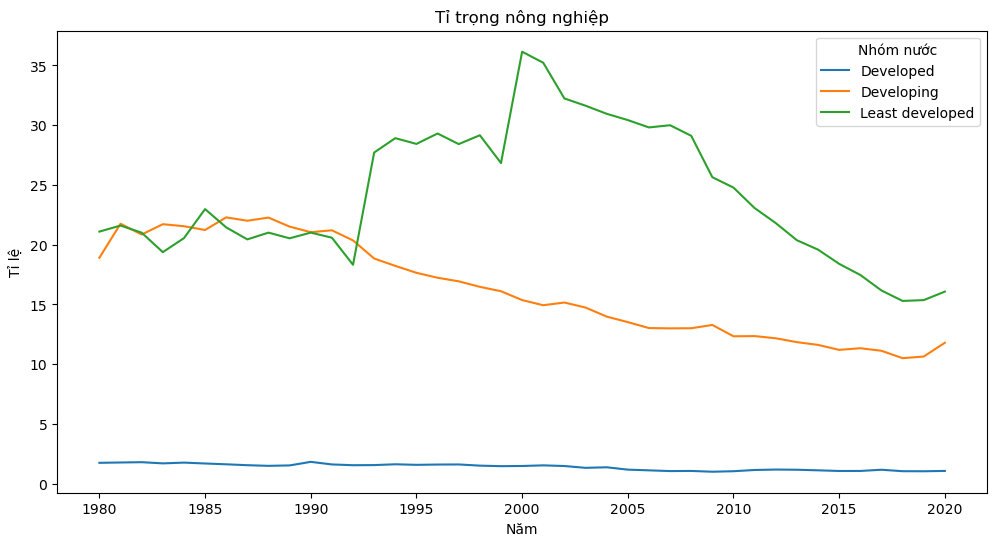

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Agriculture, forestry, and fishing, value added (% of GDP)', hue='Development_Status')
plt.title('Tỉ trọng nông nghiệp')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Các nhóm nước chưa phát triển tăng tỉ trọng nông nghiệp vào đầu những năm 2000, sau đó cũng có xu hướng giảm tỉ trọng
- Nhóm nước đang phát triển có xu hướng giảm tỉ trọng nông nghiệp trong nền kinh tế.
- Các nhóm nước phát triển giảm rất ít
- Tỉ trọng ngành nông nghiệp ở nhóm nước phát triển rất thấp(dưới 10%)

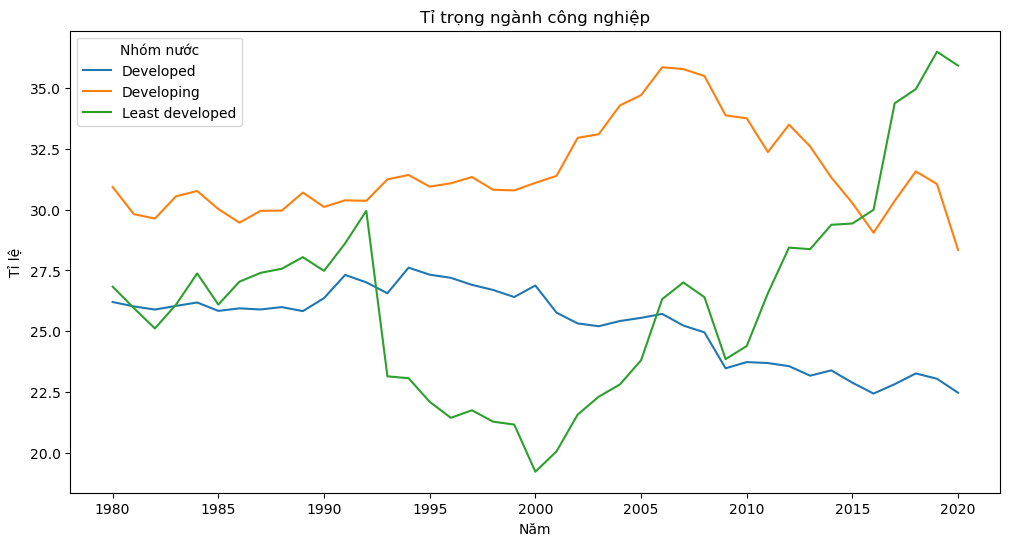

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Industry (including construction), value added (% of GDP)', hue='Development_Status')
plt.title('Tỉ trọng ngành công nghiệp')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Nhóm nước chưa phát triển có xu hướng tăng tỉ trọng ngành công nghiệp.
- Nhóm nước đang phát triển có xu hướng tăng tỉ trọng ngành công nghiệp ở khoảng những năm 2000. Nhưng khi sau đó, lại bắt đầu giảm tỉ trọng.
- Nhóm nước đã phát triển lại có tình trạng giảm tỉ trọng.

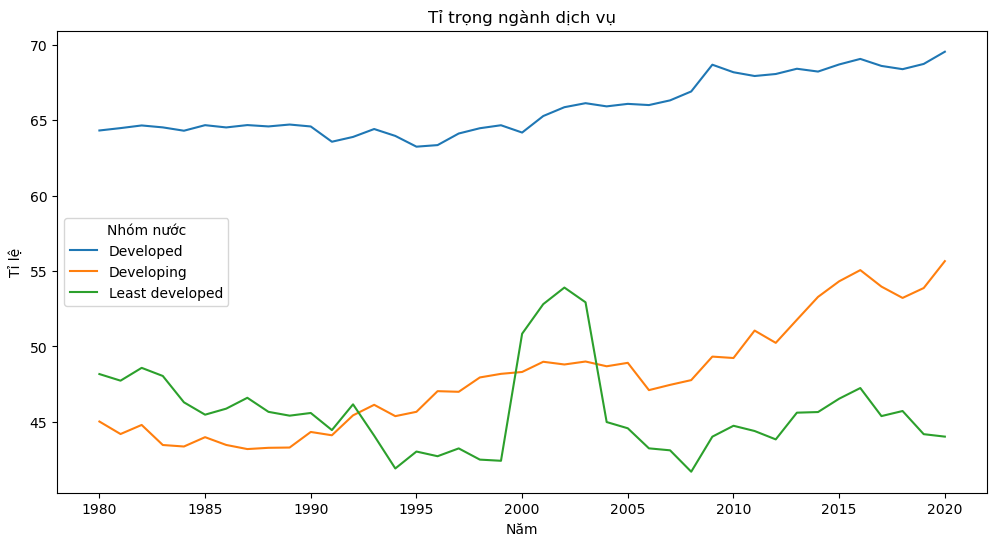

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y= 'Services, value added (% of GDP)', hue='Development_Status')
plt.title('Tỉ trọng ngành dịch vụ')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Nhóm nước chưa phats triển có tỉ trọng ngành dịch vụ biến động mạnh, ở những năm gần đây khá thấp.
- Tỉ trọng ngành dịch vụ ở nhóm nước đã phát triển rất cao(trên 60%)

**Kết luận:**
- Nhìn chung các nước đều đang tăng tỉ trọng ngành dịch vụ, giảm tỉ trọng nông nghiệp.
- Các nước đã phát triển có tỉ trọng nông nghiệp rất thấp, và họ không giảm nữa(vì đảm bảo an ninh lương thực). Nhưng họ lại giảm tỉ trọng ngành công nghiệp, ở đây sẽ là các ngành công nghiệp sản xuất, đòi hỏi kĩ thuật thấp. Nền kinh tế của họ tập trung vào khối ngành dịch vụ và công nghiệp chất lượng cao, dựa trên nền tảng công nghệ kĩ thuật vượt trội.
- Các nhóm nước chưa phát triển và đang phát triển cũng đang có xu hướng giảm tỉ trọng ngành nông nghiệp, vì nền kinh tế của họ đang chuyển dần theo hướng công nghiệp hóa-hiện đại hóa. Ngành dịch vụ cũng được quan tâm, phát triển nhưng chưa chiếm tỉ trọng cao trong nền kinh tế như nhóm nước đã phát triển

## **Kỳ**



1. Tỷ lệ đô thị hóa có liên quan gì đến tỷ lệ thất nghiệp:
Các đặc trưng:
- Unemployment, total (% of total labor force) (modeled ILO estimate)
- GDP growth (annual %)
Chọn loại biểu đồ:
- Biểu đồ đường để so sánh tuổi thọ với tỷ lệ sinh và tỷ lệ tử theo thời gian.
- Biểu đồ phân tán (Scatter Plot) để kiểm tra mối quan hệ giữa tỷ lệ sinh, tỷ lệ tử và tuổi thọ.
2. Cơ cấu lao động theo ngành thay đổi như thế nào và có liên quan gì đến tỷ lệ thất nghiệp?
Các đặc trưng:
- Employment in industry.
- Employment in agriculture.
- Employment in services.
Chọn loại biểu đồ:
- Biểu đồ cột nhóm (Grouped Bar Chart) để so sánh xu hướng thay đổi cơ cấu lao động theo ngành của các nhóm nước.
- Biểu đồ đường giúp xem xu hướng của tỉ lệ thất nghiệp ở từng quốc gia.
3. Tác động của thất nghiệp đến nền kinh tế.
Các đặc trưng:
- Unemployment, total.
- GDP growth (annual %)
Chọn loại biểu đồ:
- Biểu đồ đường (Line Chart) theo dõi xu hướng thất nghiệp và tăng trưởng GDP theo thời gian.

Kỳ - Câu 1: Tỷ lệ đô thị hóa có liên quan gì đến tỷ lệ thất nghiệp.

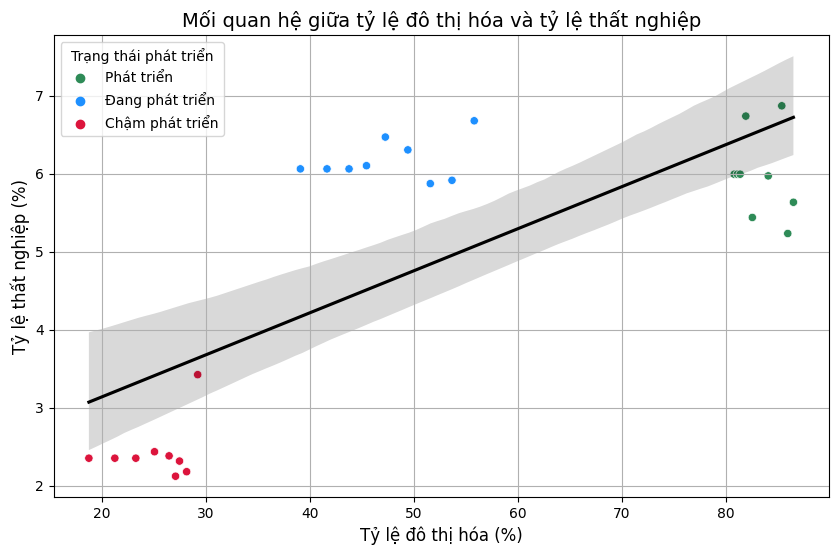

In [7]:

group_df_filtered = group_df[group_df['Year'] % 5 == 0]
# Định nghĩa bảng màu rõ ràng hơn
palette = {
    'Developed': '#2E8B57',  # Xanh lá đậm - Phát triển
    'Developing': '#1E90FF',  # Xanh dương - Đang phát triển
    'Least developed': '#DC143C'   # Đỏ - Chậm phát triển
}

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân tán
sns.scatterplot(
    data=group_df_filtered, 
    x='Urban population (% of total population)',  # Tỷ lệ đô thị hóa
    y='Unemployment, total (% of total labor force) (modeled ILO estimate)',  # Tỷ lệ thất nghiệp
    hue='Development_Status',  # Phân loại theo trạng thái phát triển
    palette=palette  # Áp dụng bảng màu mới
)

# Thêm đường hồi quy để xem xu hướng chung
sns.regplot(
    data=group_df_filtered, 
    x='Urban population (% of total population)', 
    y='Unemployment, total (% of total labor force) (modeled ILO estimate)', 
    scatter=False,  # Không hiển thị các điểm dữ liệu
    color='black'  # Màu của đường hồi quy
)

# Định dạng biểu đồ
plt.title('Mối quan hệ giữa tỷ lệ đô thị hóa và tỷ lệ thất nghiệp', fontsize=14)
plt.xlabel('Tỷ lệ đô thị hóa (%)', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)

# Cập nhật chú thích để khớp với bảng màu
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Phát triển', 'Đang phát triển', 'Chậm phát triển'], title='Trạng thái phát triển')

plt.grid()
plt.show()

Phân tích:
+ Các nước phát triển:  Các khu vực có tỷ lệ đô thị hóa cao (~80%) và tỷ lệ thất nghiệp từ 4% - 6%.
+ Các nước đang phát triển: Khu vực có tỷ lệ đô thị hóa trung bình (40-50%) và tỷ lệ thất nghiệp dao động quanh mức 6%.
+ Các nước chậm phát triển: Khu vực có tỷ lệ đô thị hóa thấp (dưới 30%) với tỷ lệ thất nghiệp thấp (~2%-3%).
+ Biểu đồ có một đường hồi quy tuyến tính (đường màu đen) với khoảng tin cậy (vùng màu xám), cho thấy xu hướng chung: khi tỷ lệ đô thị hóa tăng, tỷ lệ thất nghiệp cũng có xu hướng tăng.
Kết luận: 
+ Biểu đồ cho thấy mối quan hệ thuận giữa tỷ lệ đô thị hóa và tỷ lệ thất nghiệp – tức là khi mức độ đô thị hóa cao hơn, tỷ lệ thất nghiệp cũng có xu hướng tăng.
+ Ở các khu vực phát triển, dù đô thị hóa cao nhưng kinh tế ổn định, tỷ lệ thất nghiệp không quá cao.
+ Ở các khu vực đang phát triển, đô thị hóa nhanh nhưng chưa đủ việc làm cho dân số tăng lên, dẫn đến tỷ lệ thất nghiệp cao.
+ Ở các khu vực chậm phát triển, nền kinh tế chủ yếu dựa vào nông nghiệp hoặc ngành nghề truyền thống, ít bị ảnh hưởng bởi đô thị hóa nên tỷ lệ thất nghiệp thấp.

Kỳ - Câu 2: Cơ cấu lao động theo ngành thay đổi như thế nào và có liên quan gì đến tỷ lệ thất nghiệp?

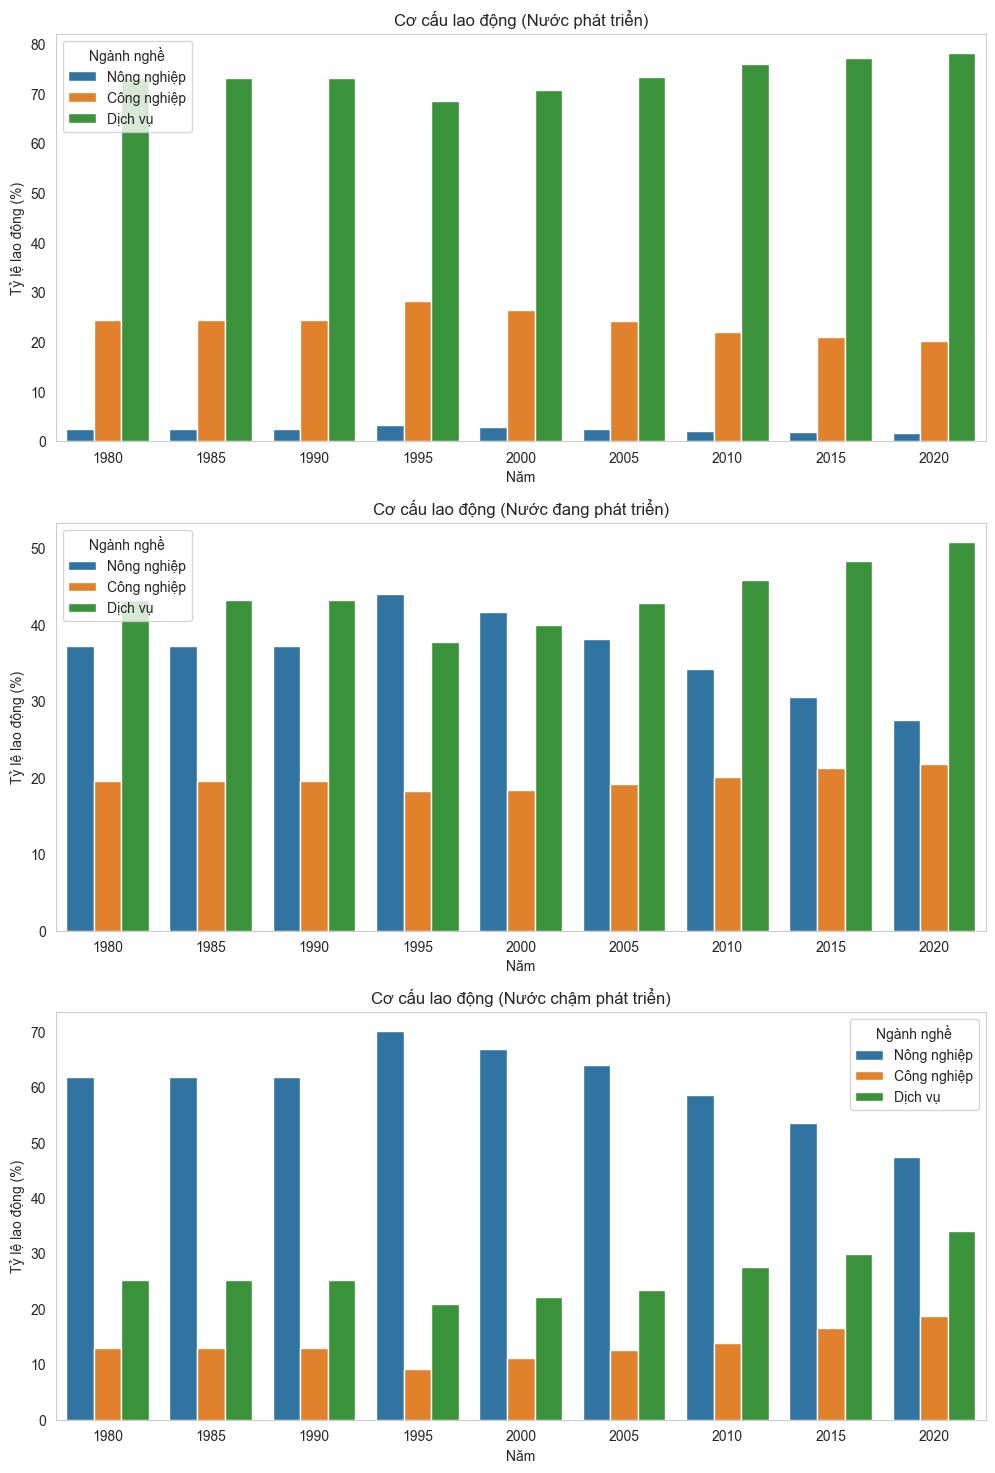

In [28]:


development_groups = {
    "Developed" : 'Nước phát triển',
    "Developing" : 'Nước đang phát triển',
    "Least developed" : 'Nước chậm phát triển'
}

# Tạo figure với 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=False)

# Lặp qua từng nhóm phát triển để vẽ biểu đồ
for i, (status, title) in enumerate(development_groups.items()):
    subset = group_df_filtered[group_df_filtered['Development_Status'] == status]

    # Chuyển đổi dữ liệu sang dạng phù hợp cho biểu đồ cột nhóm
    subset_melted = subset.melt(id_vars=['Year'], 
                                value_vars=['Employment in agriculture (% of total employment) (modeled ILO estimate)',
                                            'Employment in industry (% of total employment) (modeled ILO estimate)',
                                            'Employment in services (% of total employment) (modeled ILO estimate)'],
                                var_name='Ngành nghề', 
                                value_name='Tỷ lệ lao động')

    # Đổi tên ngành nghề để dễ đọc
    subset_melted['Ngành nghề'] = subset_melted['Ngành nghề'].replace({
        'Employment in agriculture (% of total employment) (modeled ILO estimate)': 'Nông nghiệp',
        'Employment in industry (% of total employment) (modeled ILO estimate)': 'Công nghiệp',
        'Employment in services (% of total employment) (modeled ILO estimate)': 'Dịch vụ'
    })

    # Vẽ biểu đồ cột nhóm
    sns.barplot(data=subset_melted, x='Year', y='Tỷ lệ lao động', hue='Ngành nghề', ax=axes[i])
    # Cài đặt tiêu đề và nhãn
    axes[i].set_title(f'Cơ cấu lao động ({title})')
    axes[i].set_ylabel('Tỷ lệ lao động (%)')
    axes[i].set_xlabel('Năm')
    axes[i].legend(title='Ngành nghề')
    axes[i].grid(axis='y')
# Hiển thị biểu đồ
plt.show()


Phân tích:
- Cơ cấu lao động ở nước phát triển:
+ Ngành dịch vụ (màu xanh lá) chiếm tỷ trọng áp đảo (> 60%) và tiếp tục tăng dần theo thời gian.
+ Ngành công nghiệp (màu cam) duy trì ở mức trung bình (~ 20-30%), ít biến động.
+ Ngành nông nghiệp (màu xanh dương) gần như biến mất (< 5%), cho thấy nông nghiệp không còn là ngành trọng yếu về lao động.
+ Tỉ lệ này vẫn không thay đổi nhiều trong vòng 40 năm.
- Cơ cấu lao động ở nước đang phát triển:
+ Ngành nông nghiệp (màu xanh dương) vẫn chiếm tỷ lệ đáng kể nhưng đang giảm dần qua các năm.
+ Ngành công nghiệp (màu cam) có xu hướng ổn định ở mức trung bình (~ 20-30%).
+ Ngành dịch vụ (màu xanh lá) ngày càng tăng, cho thấy sự chuyển dịch lao động sang lĩnh vực này.
+ Các nước đang phát triển đang trong quá trình chuyển đổi từ nền kinh tế nông nghiệp sang công nghiệp và dịch vụ, nhưng chưa hoàn toàn chuyển đổi mạnh như các nước phát triển.
- Cơ cấu lao động ở nước chậm phát triển:
+ Ngành nông nghiệp (màu xanh dương) vẫn chiếm tỷ trọng lớn nhất (> 50%) nhưng có xu hướng giảm dần.
+ Ngành công nghiệp (màu cam) vẫn duy trì ở mức thấp, ít thay đổi.
+ Ngành dịch vụ (màu xanh lá) bắt đầu tăng nhưng chưa đáng kể.
+ Ở các nước chậm phát triển, nông nghiệp vẫn là ngành chủ đạo, dù có xu hướng giảm dần. Công nghiệp chưa phát triển mạnh và dịch vụ vẫn còn ở mức thấp.

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

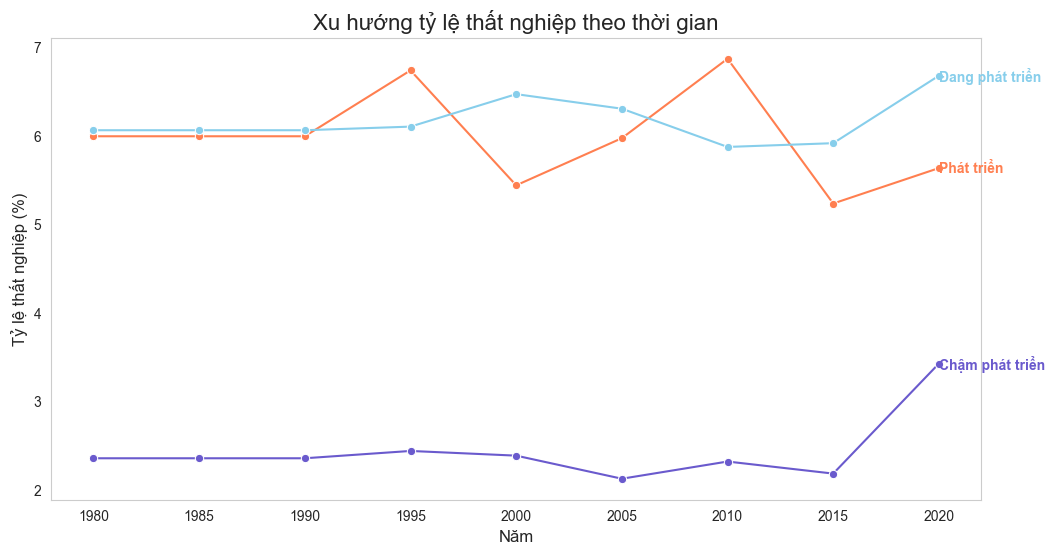

In [30]:
plt.figure(figsize=(12, 6))

# Tạo một bảng màu dễ phân biệt
palette = {
    'Phát triển': '#FF7F50',     # Màu cam
    'Đang phát triển': '#87CEEB', # Màu xanh dương nhạt
    'Chậm phát triển': '#6A5ACD'  # Màu tím
}

# Vẽ biểu đồ cho từng trạng thái phát triển
for status in group_df_filtered['Development_Status'].unique():
    data = group_df_filtered[group_df_filtered['Development_Status'] == status]
    label = 'Phát triển' if status == "Developed" else ('Đang phát triển' if status == "Developing" else 'Chậm phát triển')
    sns.lineplot(data=data, x='Year', y='Unemployment, total (% of total labor force) (modeled ILO estimate)', label=label, marker='o', color=palette[label])

# Thêm nhãn trực tiếp vào từng đường
for status in group_df_filtered['Development_Status'].unique():
    data = group_df_filtered[group_df_filtered['Development_Status'] == status]
    label = 'Phát triển' if status == "Developed" else ('Đang phát triển' if status == "Developing" else 'Chậm phát triển')
    plt.text(data['Year'].iloc[-1], data['Unemployment, total (% of total labor force) (modeled ILO estimate)'].iloc[-1], label, 
             color=palette[label], fontsize=10, weight='bold', va='center')

# Định dạng biểu đồ
plt.title('Xu hướng tỷ lệ thất nghiệp theo thời gian', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)
plt.grid()

# Loại bỏ chú thích (nếu đã gắn nhãn trực tiếp trên đường)
plt.legend().remove()

# Hiển thị biểu đồ
plt.show()

So sánh cơ cấu nền kinh tế với tỷ lệ thất nghiệp của các nhóm nước:
- Nước phát triển: 
+ Tỷ lệ thất nghiệp dao động quanh mức 6%.
+ Dù ngành dịch vụ chiếm tỷ trọng lớn, nhưng thất nghiệp vẫn duy trì ổn định, cho thấy thị trường lao động trong khu vực dịch vụ có tính ổn định cao.
- Nước đang phát triển:
+ Tỷ lệ thất nghiệp có xu hướng dao động, nhưng duy trì quanh mức 6%.
+ Sự dịch chuyển lao động từ nông nghiệp sang dịch vụ và công nghiệp chưa tạo ra nhiều việc làm bền vững, dẫn đến tình trạng thất nghiệp không ổn định.
- Nước chậm phát triển:
+ Tỷ lệ thất nghiệp thấp (khoảng 2% - 3%) cho đến năm 2015, nhưng tăng mạnh vào năm 2020.
+ Do lao động chủ yếu trong lĩnh vực nông nghiệp mang tính tự cung tự cấp nên thất nghiệp thấp, nhưng khi ngành nông nghiệp suy giảm thì thất nghiệp bắt đầu tăng.

Kết luận:
+ Nước phát triển: Dịch vụ là ngành chủ đạo, thị trường lao động ổn định, nhưng thất nghiệp vẫn duy trì ở mức trung bình do sự chuyển dịch công nghệ và cạnh tranh lao động.
+ Nước đang phát triển: Chuyển dịch cơ cấu từ nông nghiệp sang công nghiệp và dịch vụ nhưng chưa tạo ra sự ổn định cho thị trường lao động → thất nghiệp dao động.
+ Nước chậm phát triển: Tỷ lệ thất nghiệp thấp do lao động chủ yếu trong nông nghiệp, nhưng khi nông nghiệp suy giảm, thất nghiệp bắt đầu tăng.

Kỳ - Câu 3: Tác động của thất nghiệp đến nền kinh tế.

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x600 with 0 Axes>

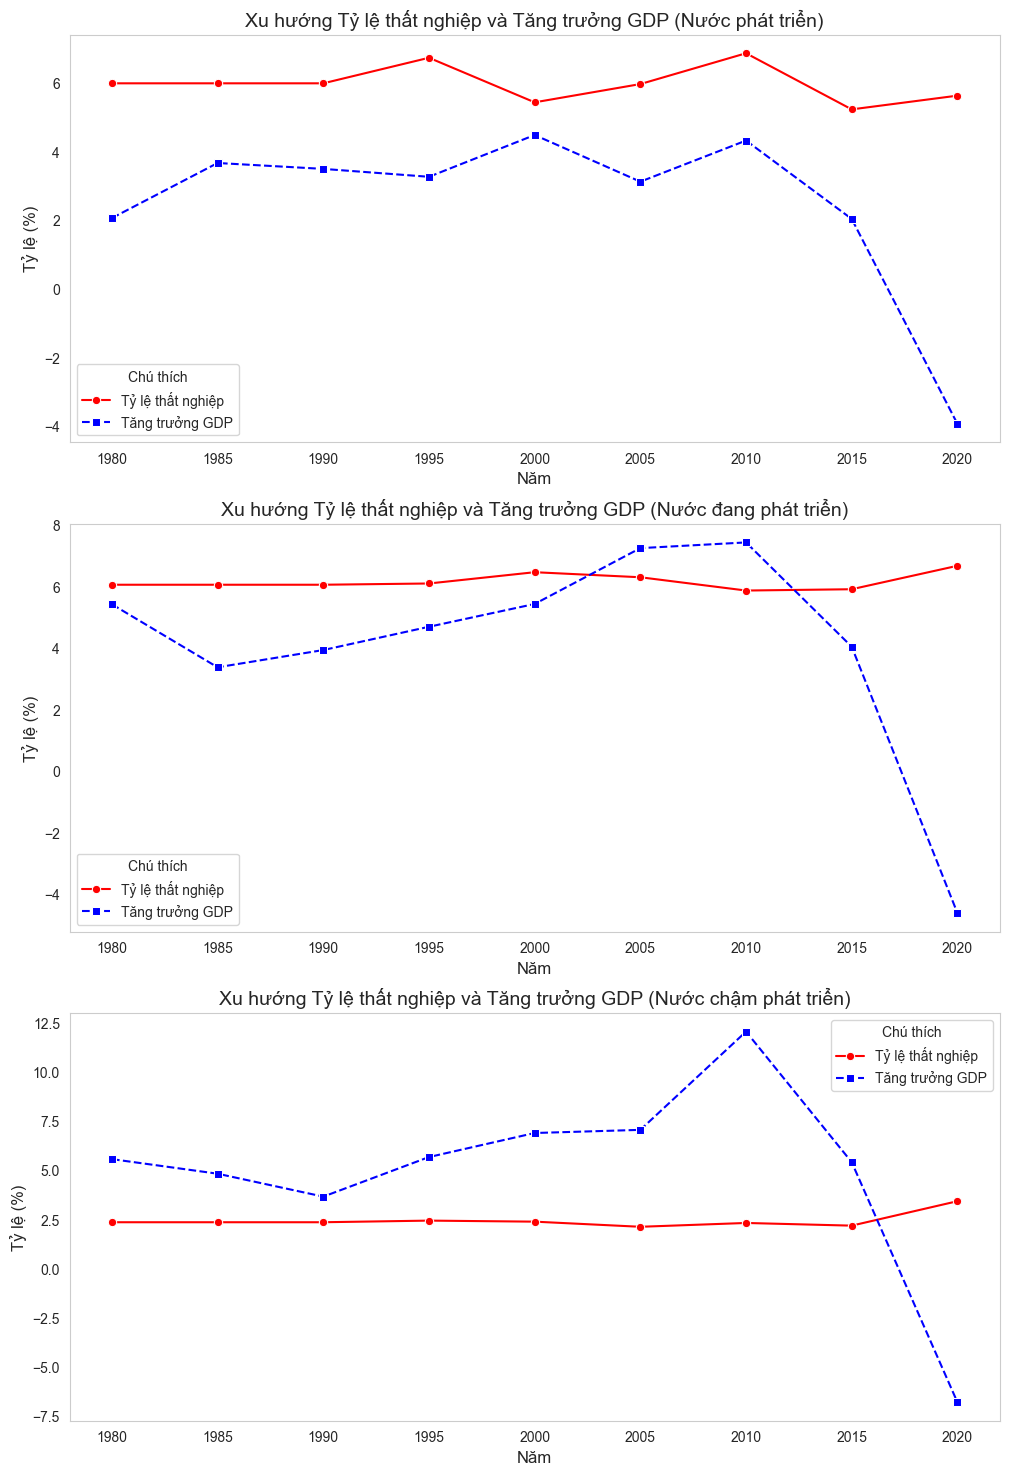

In [14]:
# --- Biểu đồ đường: Xu hướng thất nghiệp và tăng trưởng GDP theo thời gian ---
plt.figure(figsize=(12, 6))


# Tạo figure với 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=False)

# Lặp qua từng nhóm phát triển để vẽ biểu đồ
for i, (status, title) in enumerate(development_groups.items()):
    subset = group_df_filtered[group_df_filtered['Development_Status'] == status]

    # Vẽ biểu đồ đường cho Tỷ lệ thất nghiệp
    sns.lineplot(data=subset, x='Year', y='Unemployment, total (% of total labor force) (modeled ILO estimate)',
                 label='Tỷ lệ thất nghiệp', marker='o', color='red', ax=axes[i])

    # Vẽ biểu đồ đường cho Tăng trưởng GDP
    sns.lineplot(data=subset, x='Year', y='GDP growth (annual %)',
                 label='Tăng trưởng GDP', marker='s', linestyle='--', color='blue', ax=axes[i])

    # Định dạng biểu đồ
    axes[i].set_title(f'Xu hướng Tỷ lệ thất nghiệp và Tăng trưởng GDP ({title})', fontsize=14)
    axes[i].set_ylabel('Tỷ lệ (%)', fontsize=12)
    axes[i].legend(title='Chú thích', fontsize=10)
    axes[i].set_xlabel('Năm', fontsize=12)
    axes[i].grid()


# Hiển thị biểu đồ
plt.show()

Phân tích:
- Xu hướng ở nước phát triển:
+ Tỷ lệ thất nghiệp dao động trong khoảng 4-7% và có xu hướng tăng nhẹ theo thời gian.
+ Tăng trưởng GDP tương đối ổn định nhưng giảm dần, đặc biệt lao dốc mạnh sau 2015.
+ Khi GDP giảm (sau 2015), tỷ lệ thất nghiệp không giảm theo mà vẫn duy trì ở mức cao. Điều này cho thấy các nước phát triển ít bị ảnh hưởng bởi GDP ngắn hạn do có hệ thống an sinh tốt và thị trường lao động linh hoạt.
- Xu hướng ở nước đang phát triển:
+ Tỷ lệ thất nghiệp tăng dần từ ~5% lên ~7% vào năm 2020.
+ Tăng trưởng GDP có xu hướng tăng mạnh đến năm 2010 nhưng giảm mạnh sau đó.
+ Khi GDP tăng (1980 - 2010), tỷ lệ thất nghiệp vẫn tăng, cho thấy tăng trưởng chưa tạo ra đủ việc làm hoặc cơ cấu lao động chưa đáp ứng được nhu cầu kinh tế.
+ Khi GDP giảm mạnh (sau 2015), thất nghiệp vẫn tiếp tục tăng, phản ánh nền kinh tế đang phát triển nhưng chưa ổn định.
- Xu hướng ở nước chậm phát triển:
+ Tỷ lệ thất nghiệp ổn định ở mức thấp (~2-3%) nhưng có xu hướng tăng nhẹ về cuối giai đoạn.
+ Tăng trưởng GDP có sự biến động mạnh, đặc biệt là năm 2010 đạt đỉnh (~10%) rồi sụt giảm mạnh sau 2015.
+ Khi GDP tăng cao (trước 2010), tỷ lệ thất nghiệp không giảm nhiều, cho thấy tăng trưởng chưa hiệu quả trong việc tạo ra việc làm.
+ Khi GDP giảm mạnh sau 2015, thất nghiệp bắt đầu tăng nhẹ, phản ánh nền kinh tế bấp bênh.
Kết luận:
+ Tại nước phát triển: Tỷ lệ thất nghiệp ổn định dù GDP giảm, nhờ hệ thống lao động linh hoạt.
+ Tại nước đang phát triển: GDP tăng nhưng thất nghiệp vẫn tăng, do thị trường lao động chưa thích nghi tốt.
+ Tại nước chậm phát triển: GDP biến động mạnh nhưng thất nghiệp ổn định, cho thấy nền kinh tế dựa nhiều vào lao động phi chính thức hoặc nông nghiệp.
+ Nước đang phát triển và chậm phát triển cần tạo việc làm chất lượng hơn, cải thiện đào tạo lao động để tận dụng tăng trưởng GDP.
+ Đối với nước phát triển, cần duy trì ổn định kinh tế để tránh tăng trưởng GDP suy giảm kéo theo mất việc làm dài hạn.





## **Khánh** 

In [2]:
df = pd.read_csv("processed_data.csv")
df

,Year,Country,"Population, total","Population, female","Population, male","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP growth (annual %),Urban population growth (annual %),"Fertility rate, total (births per woman)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Development_Status
0,2020,Australia,25649248,12922405,12726843,11.500,6.300,1.328414e+12,6.456000,86.241,24.026739,20.637717,-0.119591,1.369185,1.581,2.765998,19.191097,78.042912,0
1,2019,Australia,25334826,12762303,12572523,12.100,6.700,1.392724e+12,5.159000,86.124,24.159678,22.027824,2.171545,1.607625,1.657,2.558293,19.058460,78.383247,0
2,2018,Australia,24963258,12575335,12387923,12.600,6.300,1.427809e+12,5.300000,86.012,21.894091,21.841975,2.878470,1.621636,1.740,2.616852,19.887638,77.495518,0
3,2017,Australia,24592588,12390298,12202290,12.600,6.500,1.325583e+12,5.592000,85.904,21.256617,20.947114,2.279592,1.767968,1.741,2.596054,19.430111,77.973844,0
4,2016,Australia,24190907,12185876,12005031,12.900,6.600,1.206837e+12,5.711000,85.800,19.278744,21.695335,2.759386,1.677390,1.752,2.621225,19.695735,77.683040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1984,Zimbabwe,8391488,4282570,4108918,43.413,8.910,6.352126e+09,2.351978,24.736,20.561138,20.804997,-1.907360,6.288552,6.083,61.859283,12.876193,25.264525,2
1144,1983,Zimbabwe,8098404,4130412,3967992,45.119,9.442,7.764067e+09,2.351978,24.069,16.442925,19.473930,1.585305,6.494284,6.246,61.859283,12.876193,25.264525,2
1145,1982,Zimbabwe,7796496,3980628,3815868,45.918,9.776,8.539701e+09,2.351978,23.429,16.925580,22.219708,2.634297,6.200968,6.382,61.859283,12.876193,25.264525,2
1146,1981,Zimbabwe,7498635,3836536,3662099,46.494,10.122,8.011374e+09,2.351978,22.895,19.425226,25.905417,12.525425,8.608049,6.511,61.859283,12.876193,25.264525,2


### **Q1: Tỉ lệ sinh và tử vong ở các nhóm quốc gia (0,1,2) từ 1980-2020**

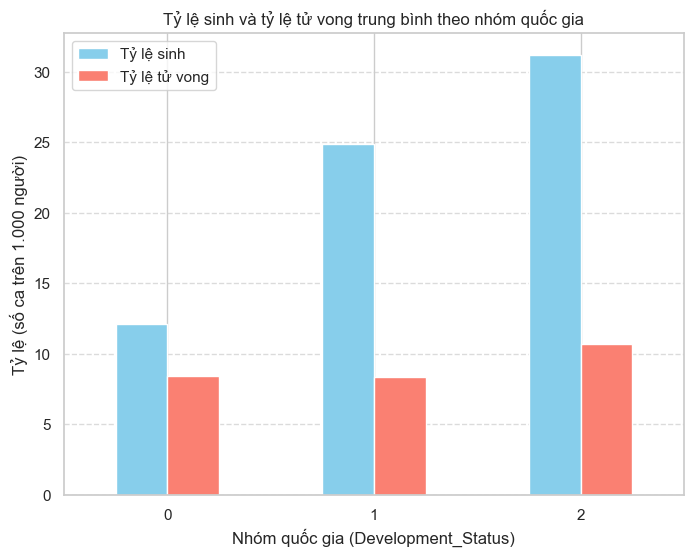

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Lọc các cột cần thiết
df_filtered = df[['Development_Status', 'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)']]

# Đổi tên cột
df_filtered.columns = ['Development Status', 'Birth Rate', 'Death Rate']

# Tính trung bình theo từng nhóm Development Status
df_grouped = df_filtered.groupby('Development Status').mean()

# Vẽ biểu đồ cột đôi
df_grouped.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])

plt.title("Tỷ lệ sinh và tỷ lệ tử vong trung bình theo nhóm quốc gia")
plt.xlabel("Nhóm quốc gia (Development_Status)")
plt.ylabel("Tỷ lệ (số ca trên 1.000 người)")
plt.xticks(rotation=0)  # Giữ nhãn trục x ngang
plt.legend(["Tỷ lệ sinh", "Tỷ lệ tử vong"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

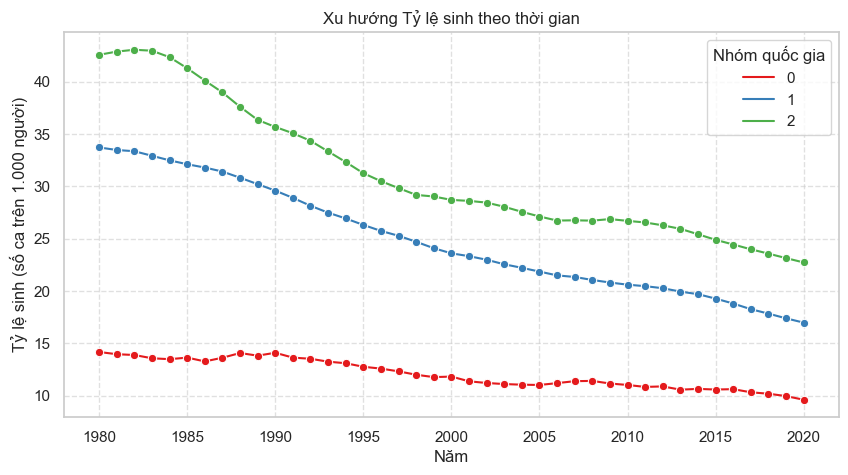

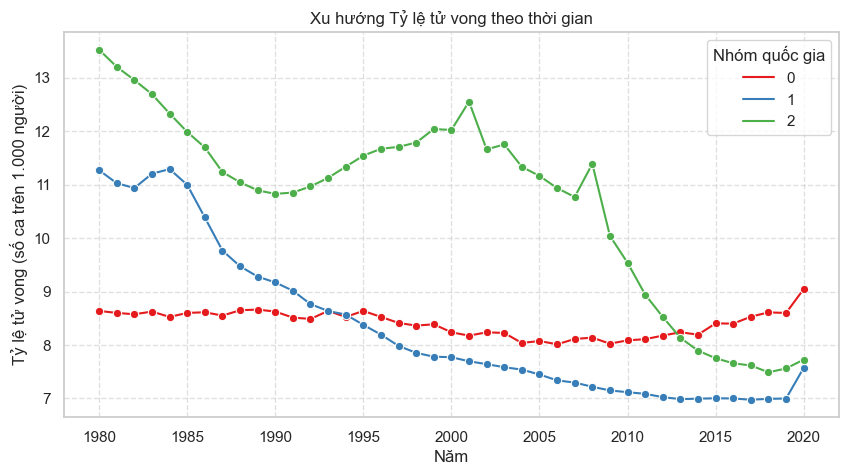

In [6]:

df_filtered = df[['Year', 'Development_Status', 'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)']]
df_filtered.columns = ['Year', 'Development Status', 'Birth Rate', 'Death Rate']

df_grouped = df_filtered.groupby(['Year', 'Development Status']).mean().reset_index()


plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Birth Rate', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ sinh theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ sinh (số ca trên 1.000 người)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Vẽ biểu đồ đường cho Tỷ lệ tử vong
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Death Rate', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ tử vong theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ tử vong (số ca trên 1.000 người)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Hiển thị
plt.show()


### **Q2 :Phân tích Phân tích Cơ cấu Lao động ngành Nông nghiệp - Công nghiệp - Dịch vụ theo nhóm quốc gia trong giai đoạn 1980-2020**

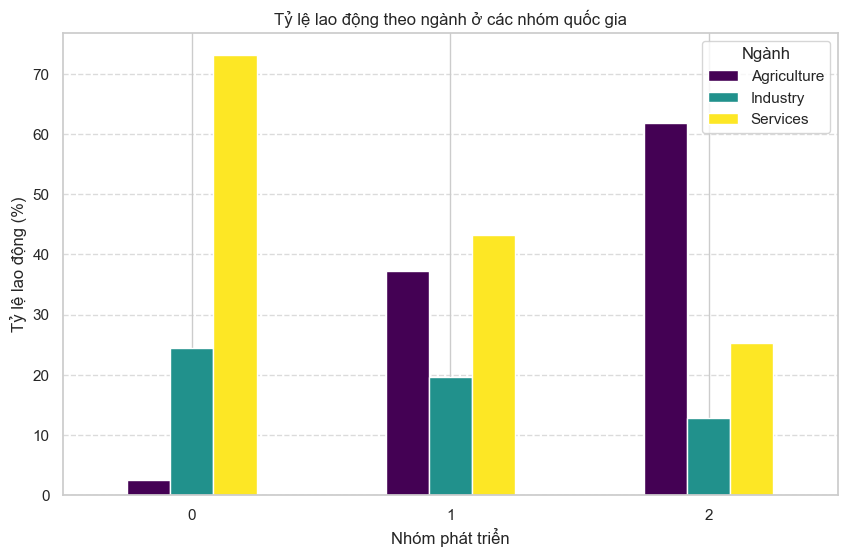

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đổi tên cột cho dễ đọc
df_renamed = df.rename(columns={
    "Employment in agriculture (% of total employment) (modeled ILO estimate)": "Agriculture",
    "Employment in industry (% of total employment) (modeled ILO estimate)": "Industry",
    "Employment in services (% of total employment) (modeled ILO estimate)": "Services"
})

# Tính trung bình theo nhóm quốc gia
df_grouped = df_renamed.groupby("Development_Status")[["Agriculture", "Industry", "Services"]].mean()

# Vẽ biểu đồ cột
df_grouped.plot(kind="bar", figsize=(10, 6), colormap="viridis")

plt.title("Tỷ lệ lao động theo ngành ở các nhóm quốc gia")
plt.ylabel("Tỷ lệ lao động (%)")
plt.xlabel("Nhóm phát triển")
plt.xticks(rotation=0)
plt.legend(title="Ngành")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

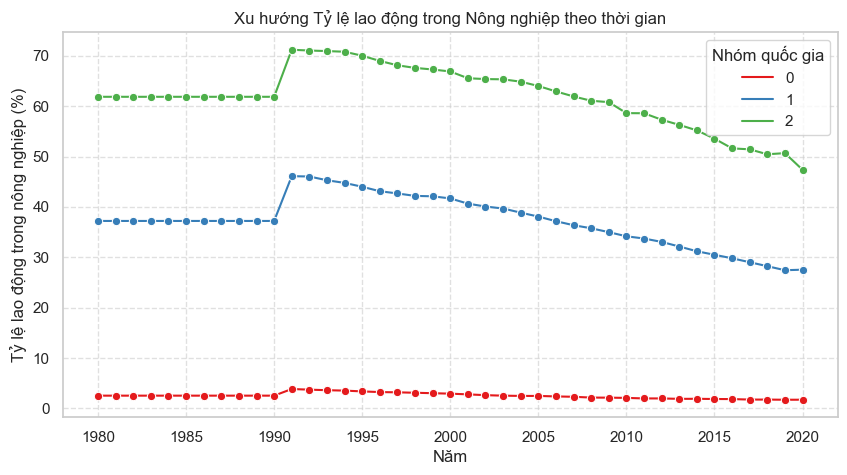

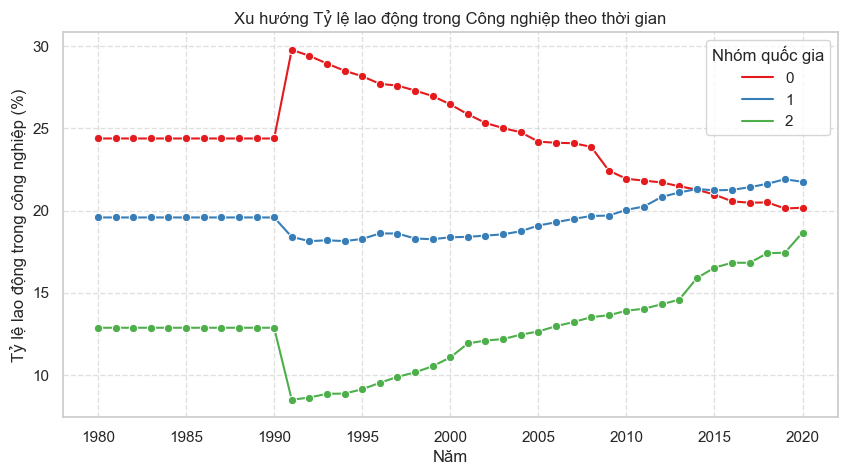

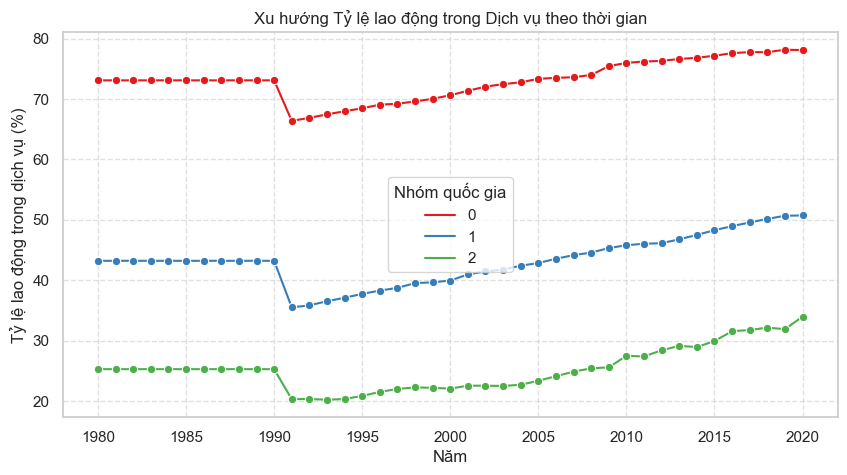

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn các cột cần thiết
df_filtered = df[['Year', 'Development_Status', 
                  'Employment in agriculture (% of total employment) (modeled ILO estimate)', 
                  'Employment in industry (% of total employment) (modeled ILO estimate)', 
                  'Employment in services (% of total employment) (modeled ILO estimate)']]

# Đổi tên cột
df_filtered.columns = ['Year', 'Development Status', 'Agriculture', 'Industry', 'Services']

# Nhóm theo năm và nhóm phát triển, tính trung bình
df_grouped = df_filtered.groupby(['Year', 'Development Status']).mean().reset_index()

# Biểu đồ đường cho Nông nghiệp
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Agriculture', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ lao động trong Nông nghiệp theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ lao động trong nông nghiệp (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Biểu đồ đường cho Công nghiệp
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Industry', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ lao động trong Công nghiệp theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ lao động trong công nghiệp (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Biểu đồ đường cho Dịch vụ
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='Year', y='Services', hue='Development Status', marker='o', palette='Set1')
plt.title("Xu hướng Tỷ lệ lao động trong Dịch vụ theo thời gian")
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ lao động trong dịch vụ (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Nhóm quốc gia")

# Hiển thị tất cả biểu đồ
plt.show()


### **Q3: Dự đoán "Bẫy thu nhập trung bình"**

**"Bẫy thu nhập trung bình"** (Middle-income trap) là hiện tượng khi một quốc gia đạt mức thu nhập trung bình nhưng không thể tiếp tục phát triển lên nhóm thu nhập cao. Các nước trong bẫy này có tốc độ tăng trưởng GDP chậm dần, không thể cạnh tranh về chi phí lao động với các nước nghèo hơn hoặc về công nghệ với các nước giàu hơn.

- Dấu hiệu của bẫy thu nhập trung bình:

✅ GDP trung bình (không quá cao, không quá thấp).

✅ Tốc độ tăng trưởng GDP suy giảm theo thời gian.

✅ Năng suất lao động không tăng đáng kể.

✅ Dịch chuyển cơ cấu kinh tế bị chậm (vẫn dựa vào nông nghiệp hoặc công nghiệp truyền thống thay vì công nghệ cao, dịch vụ).

C:\Users\phamn\AppData\Local\Temp\ipykernel_2868\3557359104.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1["distance_to_0"] = distances


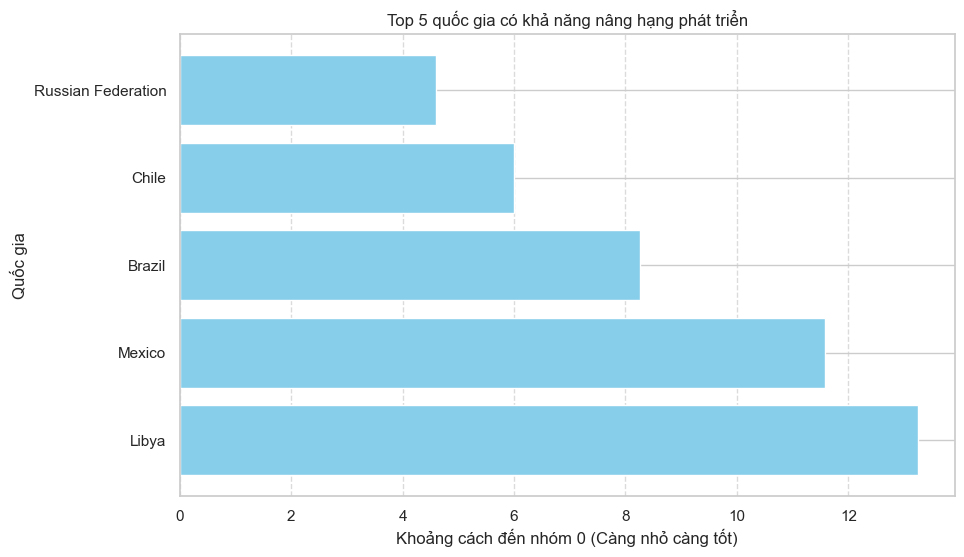

In [20]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors



# Chọn các cột quan trọng để phân tích
features = ["GDP (current US$)", "Urban population (% of total population)", 
            "Unemployment, total (% of total labor force) (modeled ILO estimate)", 
            "GDP growth (annual %)", "Employment in agriculture (% of total employment) (modeled ILO estimate)", "Employment in industry (% of total employment) (modeled ILO estimate)"
            ,"Employment in services (% of total employment) (modeled ILO estimate)"]

temp = df[df['Year'] == 2020]
# Lọc dữ liệu theo nhóm phát triển
group_0 = temp[temp["Development_Status"] == 0]
group_1 = temp[temp["Development_Status"] == 1]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_0 = scaler.fit_transform(group_0[features])
X_1 = scaler.transform(group_1[features])

# Áp dụng KNN để tìm khoảng cách từ nhóm 1 đến nhóm 0
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(X_0)
distances, indices = knn.kneighbors(X_1)

# Gán khoảng cách vào group_1 và sắp xếp theo khoảng cách tăng dần
group_1["distance_to_0"] = distances
top_candidates = group_1.sort_values(by="distance_to_0").head(5)  # Chọn top 10 nước gần nhóm 0 nhất

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(top_candidates["Country"][::-1], top_candidates["distance_to_0"][::-1], color='skyblue')

# Gắn nhãn
plt.xlabel("Khoảng cách đến nhóm 0 (Càng nhỏ càng tốt)")
plt.ylabel("Quốc gia")
plt.title("Top 5 quốc gia có khả năng nâng hạng phát triển")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()
